In [ ]:
# plan: 
# 1. overall wer distribution study "*_all_model_wer.csv", compare F/M, dialect type, 
# 2. detailed error case study "transcription_v*.csv"


In [1]:
# load wer data

import glob
dir_list = glob.glob("/users/irisz/downloads/elpis_result/*_wer_value.csv")
dir_list

['/users/irisz/downloads/elpis_result/ckm016-2023-06-10-Klana_04.TextGrid_wer_value.csv',
 '/users/irisz/downloads/elpis_result/ckm009-2023-05-26-Žminj_01.TextGrid_wer_value.csv',
 '/users/irisz/downloads/elpis_result/ckm016-2023-06-10-Klana_09.TextGrid_wer_value.csv',
 '/users/irisz/downloads/elpis_result/ckm016-2023-06-10-Klana_07.TextGrid_wer_value.csv',
 '/users/irisz/downloads/elpis_result/ckm009-2023-05-26-Žminj_02.TextGrid_wer_value.csv',
 '/users/irisz/downloads/elpis_result/ckm009-2023-05-26-Žminj_03.TextGrid_wer_value.csv',
 '/users/irisz/downloads/elpis_result/ckm016-2023-06-10-Klana_06.TextGrid_wer_value.csv',
 '/users/irisz/downloads/elpis_result/ckm009-2023-05-26-Žminj_04.TextGrid_wer_value.csv',
 '/users/irisz/downloads/elpis_result/ckm016-2023-06-10-Klana_01.TextGrid_wer_value.csv',
 '/users/irisz/downloads/elpis_result/ckm016-2023-06-10-Klana_02.TextGrid_wer_value.csv',
 '/users/irisz/downloads/elpis_result/ckm016-2023-06-10-Klana_08.TextGrid_wer_value.csv',
 '/use

In [2]:
len(dir_list)

20

In [15]:
# make a big df for all wer files
import pandas as pd
file_name_list_all = []

for i in range(len(dir_list)):
    #print (i)
    file_name = dir_list[i].split('/')[-1].split('.')[0]
    
    if i == 0:
        df = pd.read_csv(dir_list[i])
        file_name_list_curr = len(df) * [file_name]
        
    else:
        df_curr = pd.read_csv(dir_list[i])
        file_name_list_curr = len(df_curr) * [file_name]
        df = pd.concat([df, df_curr], ignore_index=True, sort=False)
    file_name_list_all = file_name_list_all + file_name_list_curr
df['audio_file'] = file_name_list_all
df

,Unnamed: 0,index,chunk_name,file_tier,xmin,xmax,start_id,end_id,text,text_clean,transcription,wer,wer_value,audio_file
0,0,0,2_1,2,0.944308,12.977866,0,1,((church bell chimes)) I- od majhaniga (.) smo...,"['i', 'od', 'majhaniga', 'smo', 'skijali', 'od...","['ki', 'zna', 'smo', 'šli', 'na', 'on', 'ormar...","(160.0, 3, 15, 14, 2, 20)",160.000000,ckm016-2023-06-10-Klana_04
1,1,1,2_2,2,12.977866,23.391233,1,8,((church bell chimes)) ((church bell chimes)) ...,"['postoli', 'ni', 'bilo', 'baš', 'pravih', 'no...","['po', 'po', 'školun', 'ni', 'bilo', 'baš', 'p...","(169.23076923076923, 4, 5, 13, 4, 13)",169.230769,ckm016-2023-06-10-Klana_04
2,2,2,2_3,2,23.391233,34.109459,8,11,"((church bell chimes)) I onda, (.) kamo ćeš st...","['i', 'onda', 'kamo', 'ćeš', 'stavit', 'noge',...","['znan', 'da', 'tamo', 'ćeš', 'cvale', 'nove',...","(133.33333333333331, 7, 14, 11, 3, 24)",133.333333,ckm016-2023-06-10-Klana_04
3,3,3,2_4,2,34.475491,44.478272,11,15,((church bell chimes)) ako ih staviš naglo va-...,"['ako', 'ih', 'staviš', 'naglo', 'va', 'va', '...","['ako', 'je', 'forši', 'ja', 'provala', 'pa', ...","(135.29411764705884, 1, 12, 10, 4, 17)",135.294118,ckm016-2023-06-10-Klana_04
4,4,4,2_5,2,44.478272,55.043942,15,18,Ta ozljeda se je zvala buhanci. ((church bell ...,"['ta', 'ozljeda', 'se', 'je', 'zvala', 'buhanc...","['pa', 'palo', 'va', 'se', 'znalo', 'puhanci',...","(143.47826086956522, 4, 13, 16, 6, 23)",143.478261,ckm016-2023-06-10-Klana_04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,54,54,1_17,1,516.856055,524.856055,38,39,Mhm.,['mhm'],[],"(inf, 0, 0, 1, 0, 0)",inf,ckm015-2023-06-08-Klana_03
1085,55,55,2_39,2,526.121886,536.189398,130,137,"baš klanjski- smo med sobu, na hodniku i tako,...","['baš', 'klanjski', 'smo', 'med', 'sobu', 'na'...","['baš', 'turski', 'smo', 'već', 'to', 'ona', '...","(91.30434782608695, 8, 6, 7, 9, 23)",91.304348,ckm015-2023-06-08-Klana_03
1086,56,56,2_40,2,538.166933,551.284034,137,139,"Ne znan, mislin, @- okej, više-manje, ali @ @-...","['ne', 'znan', 'mislin', 'okej', 'višemanje', ...","['nas', 'nami', 'se', 'op', 'težak', 'ja', 're...","(163.63636363636365, 2, 25, 27, 6, 33)",163.636364,ckm015-2023-06-08-Klana_03
1087,57,57,2_41,2,551.284034,562.555224,139,143,((breath)) niki ti jako drag ostane za cili ži...,"['niki', 'ti', 'jako', 'drag', 'ostane', 'za',...","['neki', 'jako', 'dragu', 'ostane', 'zateži', ...","(130.0, 8, 15, 16, 7, 30)",130.000000,ckm015-2023-06-08-Klana_03


In [16]:
df_2 = df[df['text_clean'] != '[]']
df_2

,Unnamed: 0,index,chunk_name,file_tier,xmin,xmax,start_id,end_id,text,text_clean,transcription,wer,wer_value,audio_file
0,0,0,2_1,2,0.944308,12.977866,0,1,((church bell chimes)) I- od majhaniga (.) smo...,"['i', 'od', 'majhaniga', 'smo', 'skijali', 'od...","['ki', 'zna', 'smo', 'šli', 'na', 'on', 'ormar...","(160.0, 3, 15, 14, 2, 20)",160.000000,ckm016-2023-06-10-Klana_04
1,1,1,2_2,2,12.977866,23.391233,1,8,((church bell chimes)) ((church bell chimes)) ...,"['postoli', 'ni', 'bilo', 'baš', 'pravih', 'no...","['po', 'po', 'školun', 'ni', 'bilo', 'baš', 'p...","(169.23076923076923, 4, 5, 13, 4, 13)",169.230769,ckm016-2023-06-10-Klana_04
2,2,2,2_3,2,23.391233,34.109459,8,11,"((church bell chimes)) I onda, (.) kamo ćeš st...","['i', 'onda', 'kamo', 'ćeš', 'stavit', 'noge',...","['znan', 'da', 'tamo', 'ćeš', 'cvale', 'nove',...","(133.33333333333331, 7, 14, 11, 3, 24)",133.333333,ckm016-2023-06-10-Klana_04
3,3,3,2_4,2,34.475491,44.478272,11,15,((church bell chimes)) ako ih staviš naglo va-...,"['ako', 'ih', 'staviš', 'naglo', 'va', 'va', '...","['ako', 'je', 'forši', 'ja', 'provala', 'pa', ...","(135.29411764705884, 1, 12, 10, 4, 17)",135.294118,ckm016-2023-06-10-Klana_04
4,4,4,2_5,2,44.478272,55.043942,15,18,Ta ozljeda se je zvala buhanci. ((church bell ...,"['ta', 'ozljeda', 'se', 'je', 'zvala', 'buhanc...","['pa', 'palo', 'va', 'se', 'znalo', 'puhanci',...","(143.47826086956522, 4, 13, 16, 6, 23)",143.478261,ckm016-2023-06-10-Klana_04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,54,54,1_17,1,516.856055,524.856055,38,39,Mhm.,['mhm'],[],"(inf, 0, 0, 1, 0, 0)",inf,ckm015-2023-06-08-Klana_03
1085,55,55,2_39,2,526.121886,536.189398,130,137,"baš klanjski- smo med sobu, na hodniku i tako,...","['baš', 'klanjski', 'smo', 'med', 'sobu', 'na'...","['baš', 'turski', 'smo', 'već', 'to', 'ona', '...","(91.30434782608695, 8, 6, 7, 9, 23)",91.304348,ckm015-2023-06-08-Klana_03
1086,56,56,2_40,2,538.166933,551.284034,137,139,"Ne znan, mislin, @- okej, više-manje, ali @ @-...","['ne', 'znan', 'mislin', 'okej', 'višemanje', ...","['nas', 'nami', 'se', 'op', 'težak', 'ja', 're...","(163.63636363636365, 2, 25, 27, 6, 33)",163.636364,ckm015-2023-06-08-Klana_03
1087,57,57,2_41,2,551.284034,562.555224,139,143,((breath)) niki ti jako drag ostane za cili ži...,"['niki', 'ti', 'jako', 'drag', 'ostane', 'za',...","['neki', 'jako', 'dragu', 'ostane', 'zateži', ...","(130.0, 8, 15, 16, 7, 30)",130.000000,ckm015-2023-06-08-Klana_03


In [17]:
df_2['wer_value'].value_counts()


100.000000    33
133.333333    27
125.000000    27
150.000000    26
inf           26
              ..
103.225806     1
107.894737     1
212.500000     1
92.452830      1
93.939394      1
Name: wer_value, Length: 427, dtype: int64

In [18]:
import numpy as np
df_2[df_2['wer_value'] == np.inf]

,Unnamed: 0,index,chunk_name,file_tier,xmin,xmax,start_id,end_id,text,text_clean,transcription,wer,wer_value,audio_file
6,6,6,1_1,1,61.787523,62.209318,0,2,Mhm.,['mhm'],[],"(inf, 0, 0, 1, 0, 0)",inf,ckm016-2023-06-10-Klana_04
111,61,61,2_46,2,583.471466,583.638686,180,182,E.,['e'],[],"(inf, 0, 0, 1, 0, 0)",inf,ckm009-2023-05-26-Žminj_01
248,29,29,1_9,1,296.460020,304.460020,21,22,Mhm.,['mhm'],[],"(inf, 0, 0, 1, 0, 0)",inf,ckm009-2023-05-26-Žminj_02
251,32,32,1_10,1,324.922562,332.922562,22,23,Mhm.,['mhm'],[],"(inf, 0, 0, 1, 0, 0)",inf,ckm009-2023-05-26-Žminj_02
274,55,55,1_19,1,518.476267,519.055106,56,58,Mhm.,['mhm'],[],"(inf, 0, 0, 1, 0, 0)",inf,ckm009-2023-05-26-Žminj_02
282,2,2,1_2,1,11.319505,19.319505,4,5,Mhm.,['mhm'],[],"(inf, 0, 0, 1, 0, 0)",inf,ckm009-2023-05-26-Žminj_03
285,5,5,1_3,1,35.367833,43.367833,5,6,Mhm.,['mhm'],[],"(inf, 0, 0, 1, 0, 0)",inf,ckm009-2023-05-26-Žminj_03
293,13,13,1_7,1,94.928363,102.928363,17,18,Da?,['da'],[],"(inf, 0, 0, 1, 0, 0)",inf,ckm009-2023-05-26-Žminj_03
339,59,59,1_23,1,540.906857,548.906857,71,73,Mhm.,['mhm'],[],"(inf, 0, 0, 1, 0, 0)",inf,ckm009-2023-05-26-Žminj_03
397,51,51,1_5,1,581.763183,582.239505,5,7,Mhm.,['mhm'],[],"(inf, 0, 0, 1, 0, 0)",inf,ckm016-2023-06-10-Klana_06


In [19]:
df_2['audio_file'] = df_2['audio_file'].apply(lambda x: x.split("-")[0])

<ipython-input-19-2014eeca4aa7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['audio_file'] = df_2['audio_file'].apply(lambda x: x.split("-")[0])


In [20]:
df_2['audio_file'].value_counts()

ckm016    516
ckm015    339
ckm009    224
Name: audio_file, dtype: int64

In [21]:
df_2

,Unnamed: 0,index,chunk_name,file_tier,xmin,xmax,start_id,end_id,text,text_clean,transcription,wer,wer_value,audio_file
0,0,0,2_1,2,0.944308,12.977866,0,1,((church bell chimes)) I- od majhaniga (.) smo...,"['i', 'od', 'majhaniga', 'smo', 'skijali', 'od...","['ki', 'zna', 'smo', 'šli', 'na', 'on', 'ormar...","(160.0, 3, 15, 14, 2, 20)",160.000000,ckm016
1,1,1,2_2,2,12.977866,23.391233,1,8,((church bell chimes)) ((church bell chimes)) ...,"['postoli', 'ni', 'bilo', 'baš', 'pravih', 'no...","['po', 'po', 'školun', 'ni', 'bilo', 'baš', 'p...","(169.23076923076923, 4, 5, 13, 4, 13)",169.230769,ckm016
2,2,2,2_3,2,23.391233,34.109459,8,11,"((church bell chimes)) I onda, (.) kamo ćeš st...","['i', 'onda', 'kamo', 'ćeš', 'stavit', 'noge',...","['znan', 'da', 'tamo', 'ćeš', 'cvale', 'nove',...","(133.33333333333331, 7, 14, 11, 3, 24)",133.333333,ckm016
3,3,3,2_4,2,34.475491,44.478272,11,15,((church bell chimes)) ako ih staviš naglo va-...,"['ako', 'ih', 'staviš', 'naglo', 'va', 'va', '...","['ako', 'je', 'forši', 'ja', 'provala', 'pa', ...","(135.29411764705884, 1, 12, 10, 4, 17)",135.294118,ckm016
4,4,4,2_5,2,44.478272,55.043942,15,18,Ta ozljeda se je zvala buhanci. ((church bell ...,"['ta', 'ozljeda', 'se', 'je', 'zvala', 'buhanc...","['pa', 'palo', 'va', 'se', 'znalo', 'puhanci',...","(143.47826086956522, 4, 13, 16, 6, 23)",143.478261,ckm016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,54,54,1_17,1,516.856055,524.856055,38,39,Mhm.,['mhm'],[],"(inf, 0, 0, 1, 0, 0)",inf,ckm015
1085,55,55,2_39,2,526.121886,536.189398,130,137,"baš klanjski- smo med sobu, na hodniku i tako,...","['baš', 'klanjski', 'smo', 'med', 'sobu', 'na'...","['baš', 'turski', 'smo', 'već', 'to', 'ona', '...","(91.30434782608695, 8, 6, 7, 9, 23)",91.304348,ckm015
1086,56,56,2_40,2,538.166933,551.284034,137,139,"Ne znan, mislin, @- okej, više-manje, ali @ @-...","['ne', 'znan', 'mislin', 'okej', 'višemanje', ...","['nas', 'nami', 'se', 'op', 'težak', 'ja', 're...","(163.63636363636365, 2, 25, 27, 6, 33)",163.636364,ckm015
1087,57,57,2_41,2,551.284034,562.555224,139,143,((breath)) niki ti jako drag ostane za cili ži...,"['niki', 'ti', 'jako', 'drag', 'ostane', 'za',...","['neki', 'jako', 'dragu', 'ostane', 'zateži', ...","(130.0, 8, 15, 16, 7, 30)",130.000000,ckm015


In [22]:
df_2.to_csv('/users/irisz/downloads/elpis_result/elpis_wer_all.csv')

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

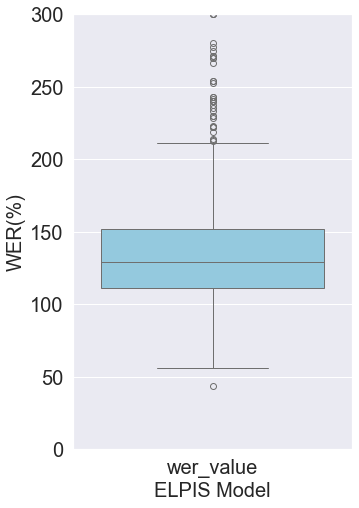

In [37]:
df_4 = df_2[['wer_value']]
ax = sns.boxplot(x="variable", y="value", data=pd.melt(df_4), color='skyblue')

ax.tick_params(labelsize=20)
ax.set_xlabel("ELPIS Model",fontsize=20)
ax.set_ylabel("WER(%)",fontsize=20)
sns.set_theme(rc={'figure.figsize':(5, 8)}, style="darkgrid")
#sns.set(font_scale = 1)
plt.ylim(0, 300)
#plt.xticks(rotation=30)
plt.show()
#ax.figure.savefig('/home/sz38235/workDir/elic/pic/whisper_wer.png',dpi=600, bbox_inches="tight")

count     616.000000
mean       78.515410
std       326.554126
min         0.000000
25%        20.000000
50%        35.241935
75%        65.156250
max      7500.000000
Name: transcription_v3_wer_wer, dtype: float64


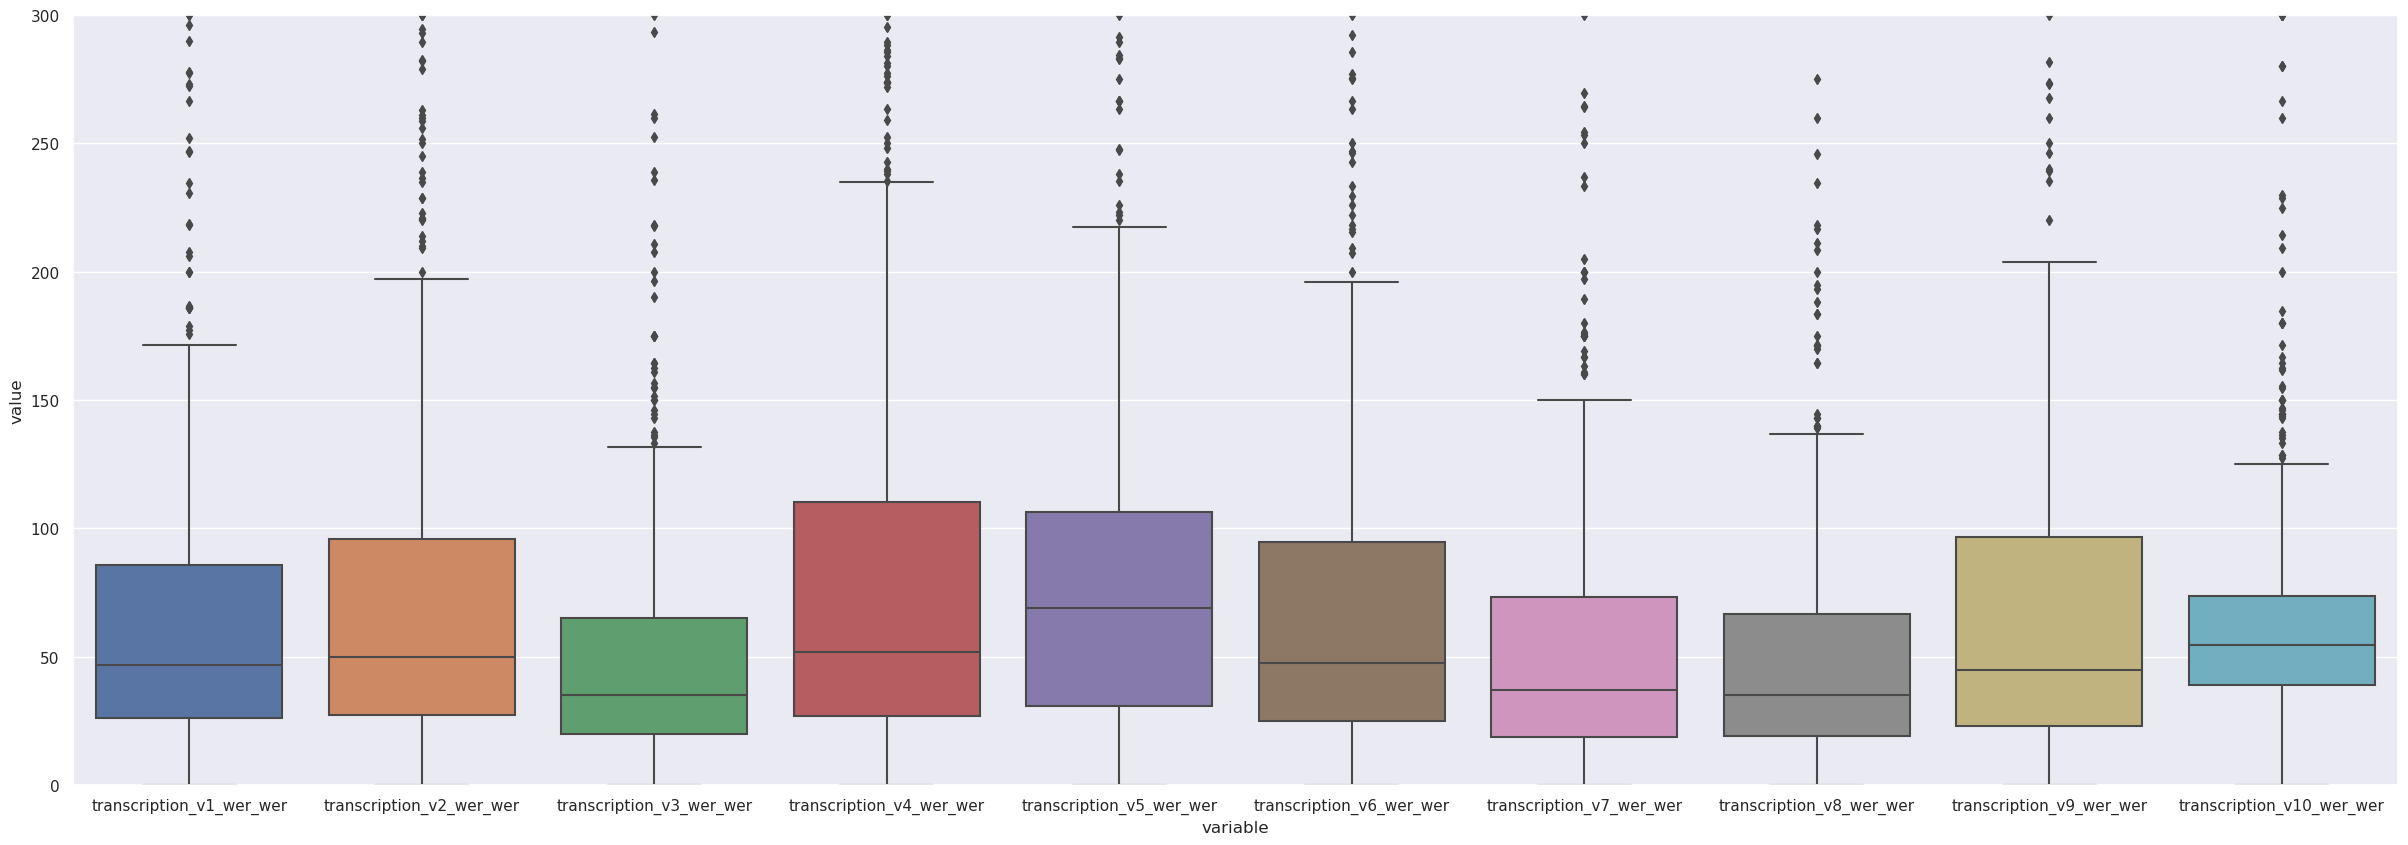

In [67]:
audio = ['ckm016', 'ckm015', 'ckm009']
df_audio = df_2[df_2['audio_file'] == audio[0]]
df_curr = df_audio[cols].replace([np.inf, -np.inf], np.nan).dropna()
print(df_curr['transcription_v3_wer_wer'].describe())

sns.boxplot(x="variable", y="value", data=pd.melt(df_curr))
sns.set_theme(rc={'figure.figsize':(30, 10)})
plt.ylim(0, 300)
plt.show()

count     327.000000
mean      119.968943
std       440.886992
min         0.000000
25%        21.212121
50%        43.902439
75%       103.448276
max      5500.000000
Name: transcription_v3_wer_wer, dtype: float64


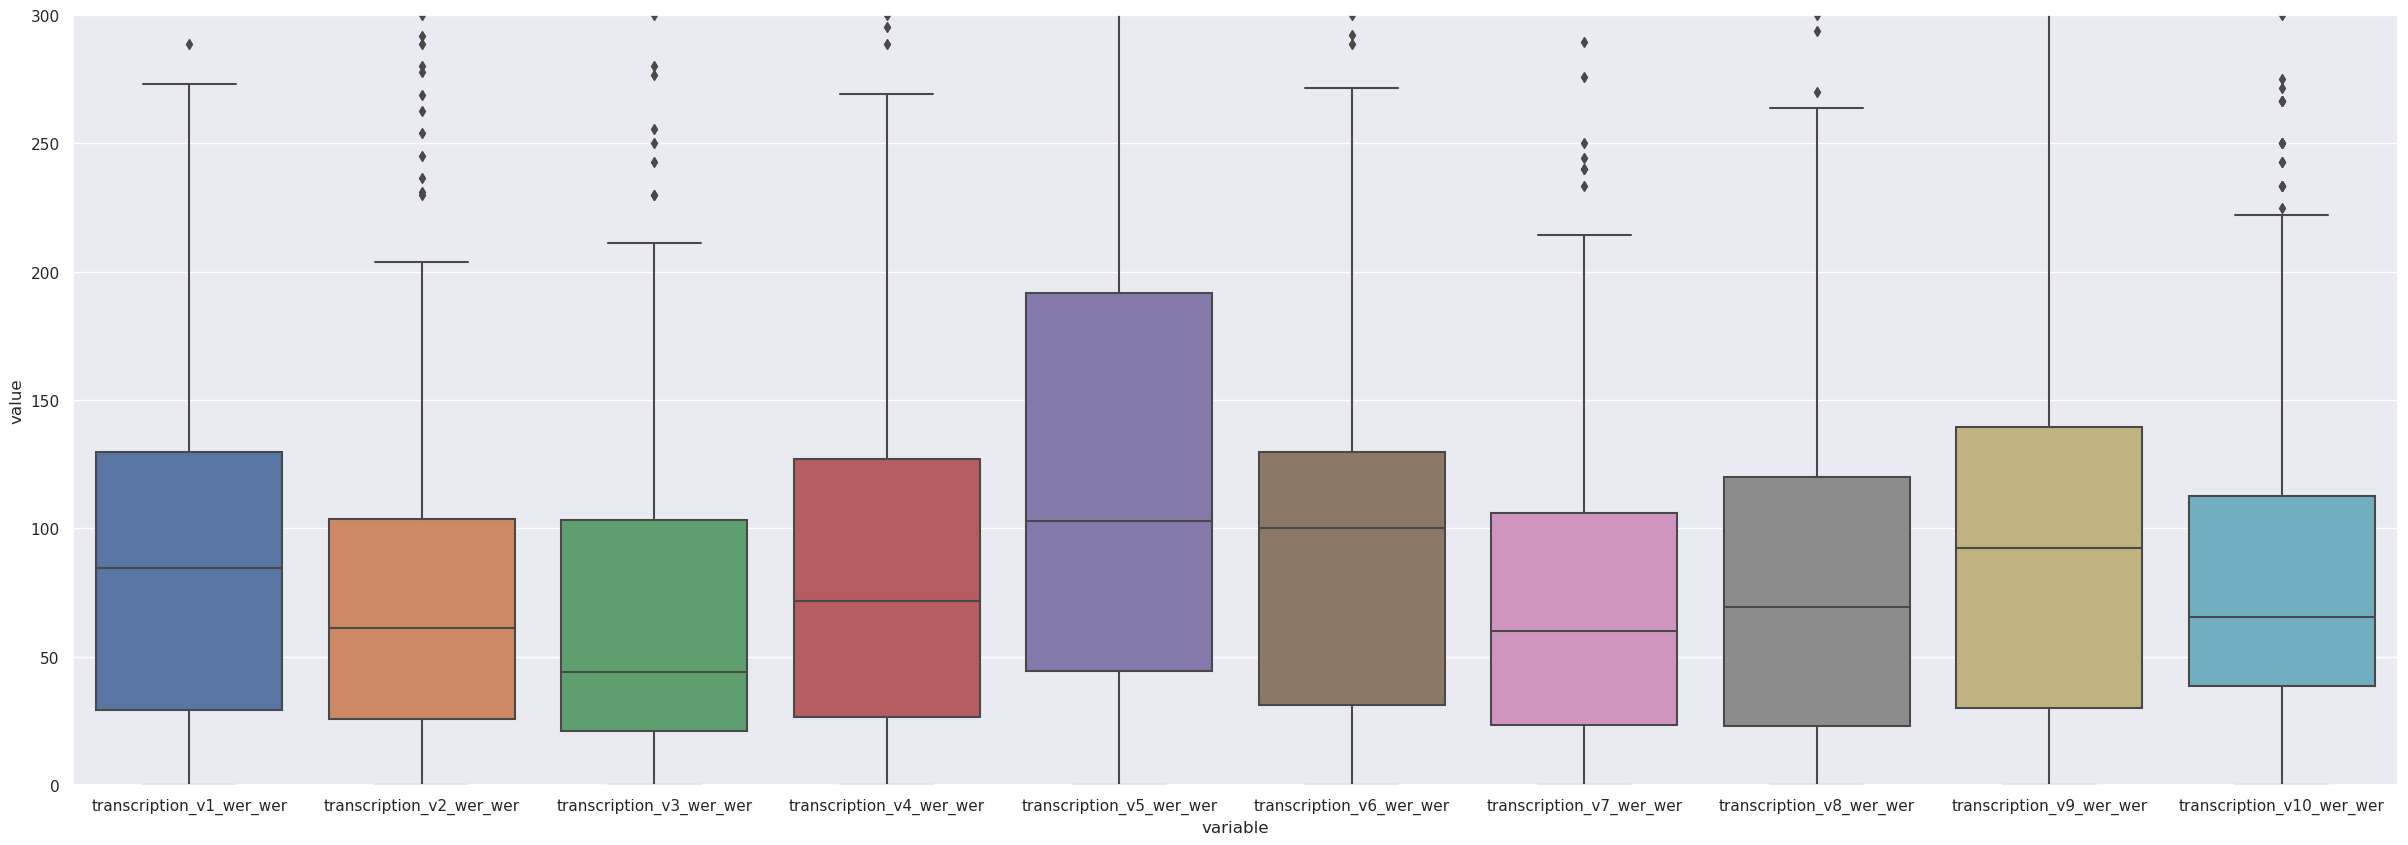

In [68]:
df_audio = df_2[df_2['audio_file'] == audio[1]]
df_curr = df_audio[cols].replace([np.inf, -np.inf], np.nan).dropna()
print(df_curr['transcription_v3_wer_wer'].describe())

sns.boxplot(x="variable", y="value", data=pd.melt(df_curr))
sns.set_theme(rc={'figure.figsize':(30, 10)})
plt.ylim(0, 300)
plt.show()

count     214.000000
mean      140.212402
std       680.495160
min         0.000000
25%        18.951094
50%        31.414474
75%        52.376910
max      8600.000000
Name: transcription_v3_wer_wer, dtype: float64


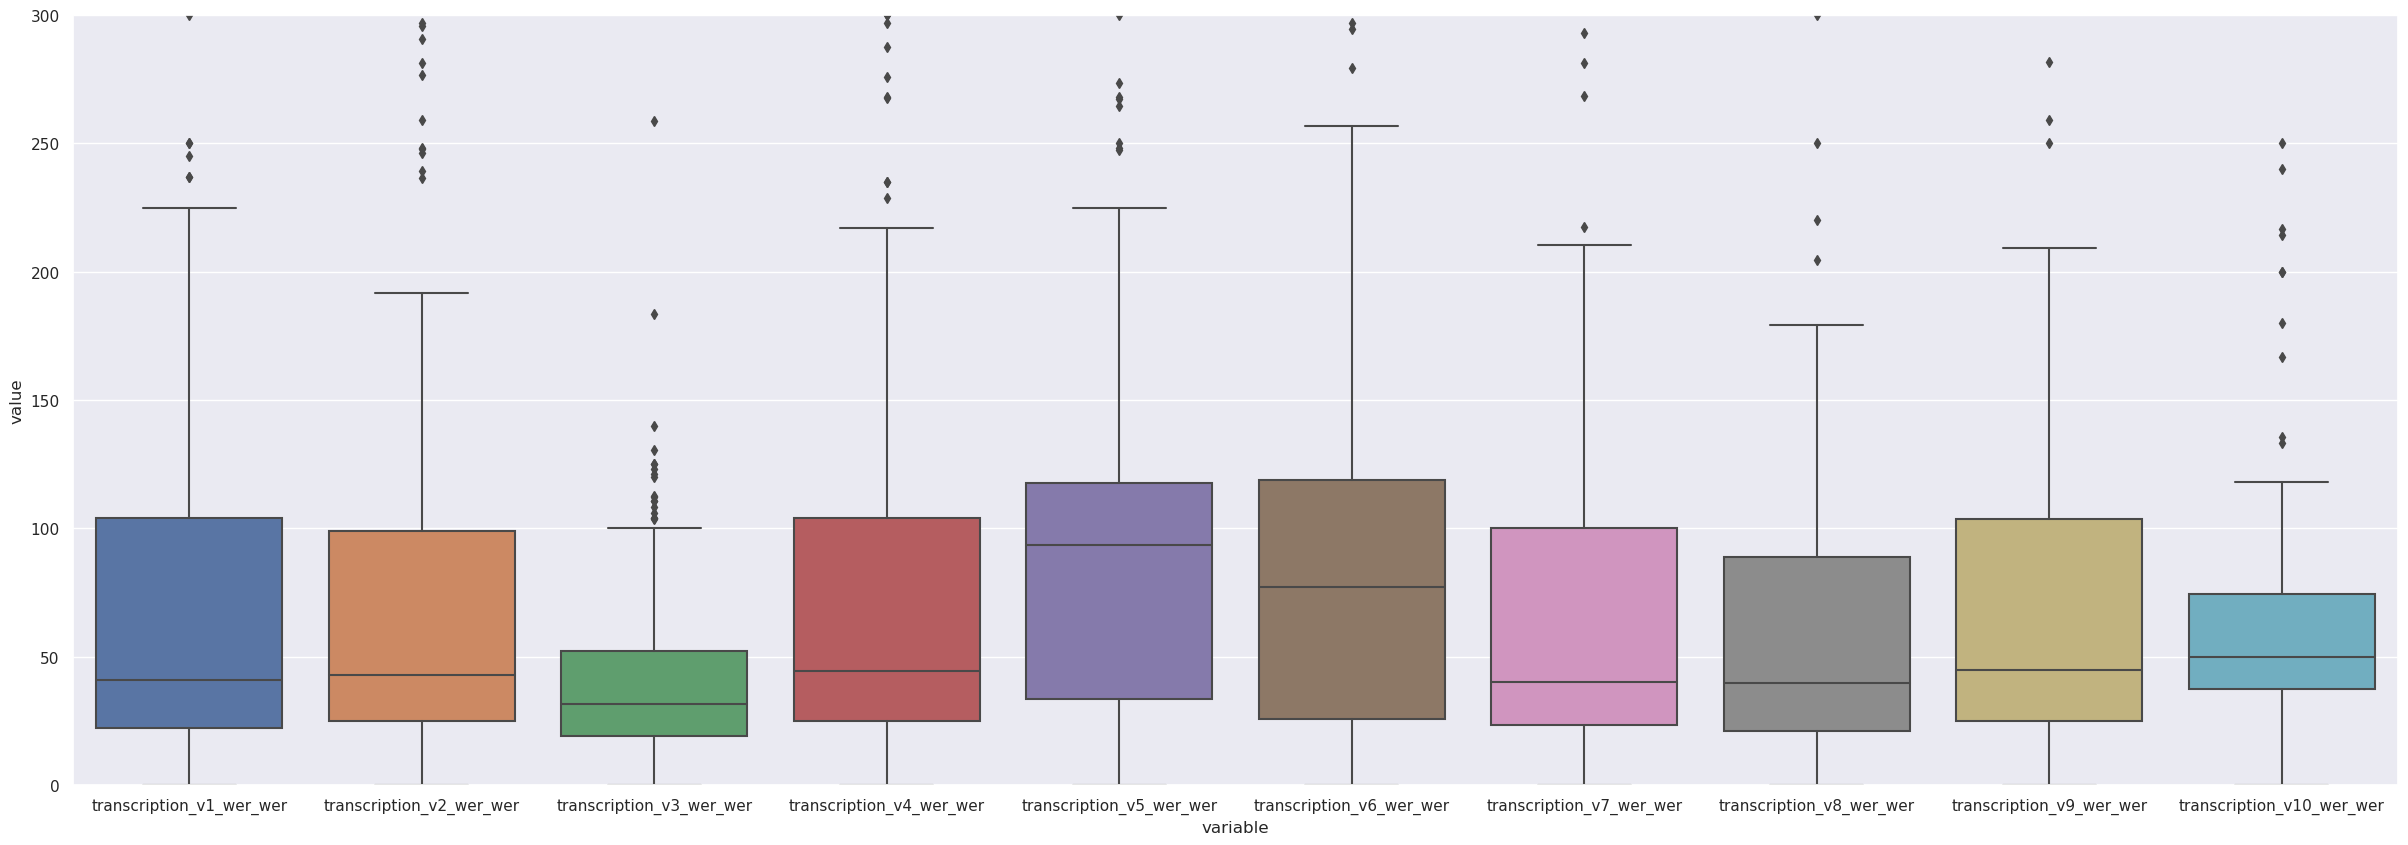

In [69]:
df_audio = df_2[df_2['audio_file'] == audio[2]]
df_curr = df_audio[cols].replace([np.inf, -np.inf], np.nan).dropna()
print(df_curr['transcription_v3_wer_wer'].describe())

sns.boxplot(x="variable", y="value", data=pd.melt(df_curr))
sns.set_theme(rc={'figure.figsize':(30, 10)})
plt.ylim(0, 300)
plt.show()

In [84]:
df_4.describe()

,transcription_v1_wer_wer,transcription_v2_wer_wer,transcription_v3_wer_wer,transcription_v4_wer_wer,transcription_v5_wer_wer,transcription_v6_wer_wer,transcription_v7_wer_wer,transcription_v8_wer_wer,transcription_v9_wer_wer,transcription_v10_wer_wer
count,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000
mean,90.108283,123.689008,101.642862,111.130537,110.000509,106.742057,74.285960,81.085143,114.857734,102.143943
std,200.562682,480.056056,444.441628,269.878388,218.894810,226.415322,149.708306,169.300722,240.445928,234.328030
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.806452,25.925926,20.000000,26.315789,33.333333,26.086957,20.833333,20.689655,25.000000,38.636364
50%,50.000000,50.000000,35.483871,53.125000,83.333333,58.823529,40.740741,40.909091,55.172414,56.000000
75%,106.779661,103.030303,80.000000,117.647059,117.777778,115.384615,94.736842,95.652174,105.263158,84.615385
max,3700.000000,10900.000000,8600.000000,7000.000000,6600.000000,4700.000000,3000.000000,3100.000000,3300.000000,3000.000000


In [46]:
df_4 = df_3.replace([np.inf, -np.inf], np.nan).dropna()
df_4

,transcription_v1_wer_wer,transcription_v2_wer_wer,transcription_v3_wer_wer,transcription_v4_wer_wer,transcription_v5_wer_wer,transcription_v6_wer_wer,transcription_v7_wer_wer,transcription_v8_wer_wer,transcription_v9_wer_wer,transcription_v10_wer_wer
0,100.000000,111.111111,44.444444,55.555556,62.500000,77.777778,66.666667,88.888889,77.777778,44.444444
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1400.000000
2,20.000000,20.000000,20.000000,0.000000,20.000000,20.000000,0.000000,0.000000,0.000000,280.000000
3,33.333333,60.000000,20.000000,40.000000,66.666667,33.333333,66.666667,33.333333,83.333333,180.000000
6,185.714286,228.571429,128.571429,150.000000,371.428571,83.333333,828.571429,142.857143,200.000000,128.571429
...,...,...,...,...,...,...,...,...,...,...
1202,50.000000,238.888889,41.176471,77.777778,50.000000,27.777778,38.888889,27.777778,33.333333,55.555556
1203,32.142857,24.137931,17.857143,46.428571,110.714286,25.000000,17.857143,25.000000,14.814815,42.857143
1204,23.529412,6.250000,17.647059,23.529412,444.444444,222.222222,11.764706,0.000000,11.764706,17.647059
1205,50.000000,50.000000,0.000000,27.777778,235.294118,0.000000,16.666667,0.000000,16.666667,22.222222


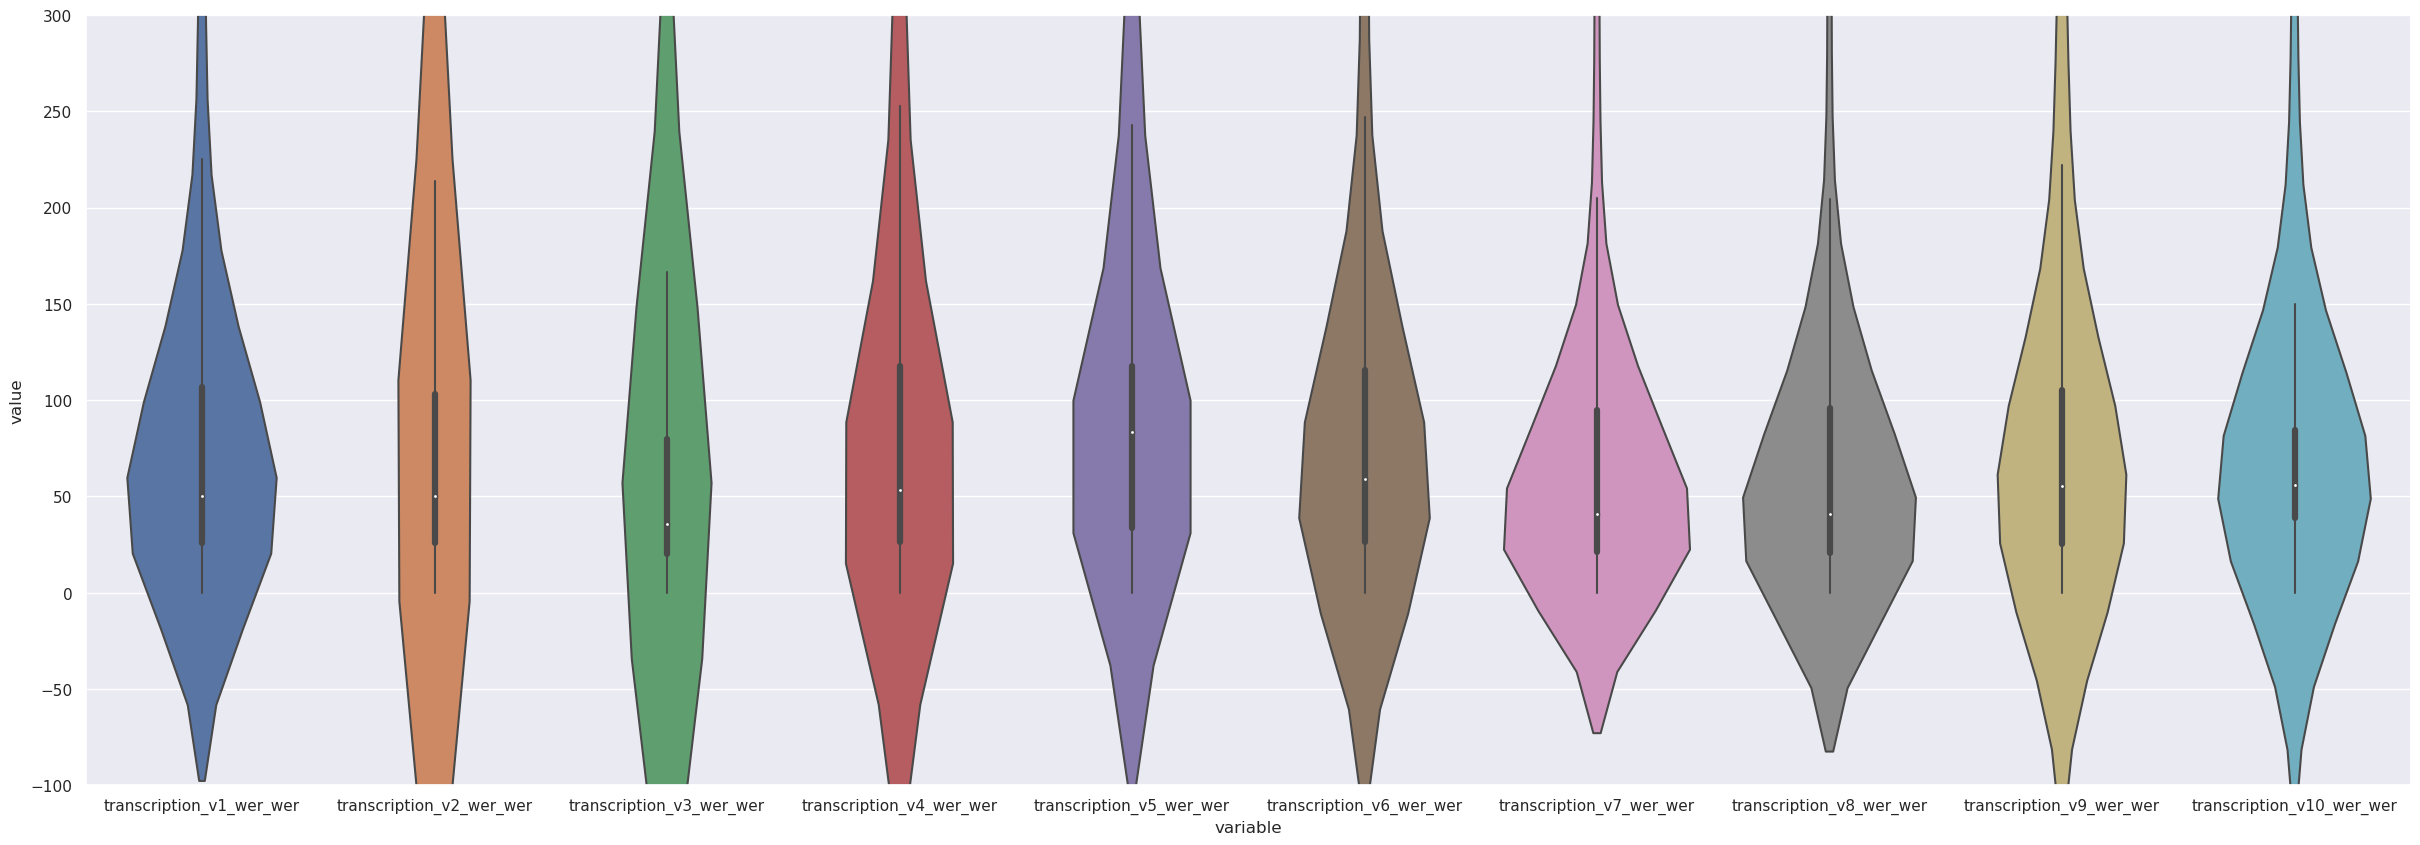

In [50]:
sns.violinplot(x="variable", y="value", data=pd.melt(df_4))
sns.set_theme(rc={'figure.figsize':(30, 5)})
plt.ylim(-100, 300)
plt.show()